Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
import nsfg
df = nsfg.ReadFemPreg()
df

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


Print value counts for <tt>birthord</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [2]:
df.birthord.value_counts().sort_index()

1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64

Print value counts for <tt>prglngth</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [10]:
prgs = df.prglngth.value_counts().sort_index()

w13orless = prgs[0:14]
w14tow26 = prgs[14:27]
w27tow50 = prgs[27:]

print sum(w13orless)
print sum(w14tow26)
print sum(w27tow50)



3522
793
9278


Print value counts for <tt>agepreg</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611935).

Looking at this data, please remember my comments in the book about the obligation to approach data with consideration for the context and respect for the respondents.

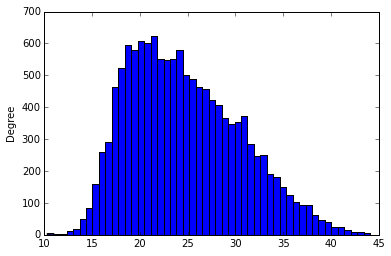

In [71]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

agepreg = df.agepreg

agepreg.plot(kind='hist', bins=50)
    




Compute the mean birthweight.

In [3]:
df.totalwgt_lb.mean()

7.2656284576233681

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [84]:
from collections import defaultdict

def convertToKg(df):
    l = []
    for i, lb in df.totalwgt_lb.iteritems():
        l.append(lb * 0.453592)
    df['totalwgt_kg'] = l
    return df

df = convertToKg(df)

print 'wgt kg: ',df.totalwgt_kg.mean()
print 'wgt kg converted to lbs:', df.totalwgt_kg.mean() / 0.453592
print 'wgt lb: ',df.totalwgt_lb.mean()



    


wgt kg:  3.29563094335
wgt kg converted to lbs: 7.26562845762
wgt lb:  7.26562845762


Look through the codebook and find a variable, other than the ones mentioned in the book, that you find interesting.  Compute values counts, means, or other statistics.

In [106]:
df.babysex.value_counts().sort_index()

print df.babysex[df.outcome==1][df.babysex==1].count()
print df.babysex[df.outcome==1][df.babysex==2].count()


4641
4500


Create a boolean Series.

In [4]:
df.outcome == 1

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14    False
...
13578     True
13579     True
13580    False
13581     True
13582    False
13583    False
13584     True
13585    False
13586    False
13587    False
13588     True
13589    False
13590    False
13591     True
13592     True
Name: outcome, Length: 13593, dtype: bool

Use a boolean Series to select the records for the pregnancies that ended in live birth.

In [109]:
live = df[df.outcome == 1]
len(live)

9148

Count the number of live births with <tt>birthwgt_lb</tt> between 0 and 5 pounds (including both).  The result should be 1125.

In [110]:
len(live[(live.birthwgt_lb >= 0) & (live.birthwgt_lb <= 5)])

1125

Count the number of live births with <tt>birthwgt_lb</tt> between 9 and 95 pounds (including both).  The result should be 798 

In [111]:
len(live[(live.birthwgt_lb >= 9) & (live.birthwgt_lb <= 95)])

798

Use <tt>birthord</tt> to select the records for first babies and others.  How many are there of each?

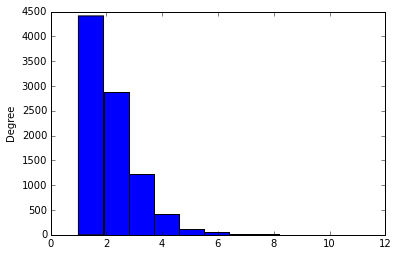

In [115]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

df.birthord.plot('hist')

Compute the mean weight for first babies and others.

In [116]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [117]:
others.totalwgt_lb.mean()

7.325855614973262

Compute the mean <tt>prglngth</tt> for first babies and others.  Compute the difference in means, expressed in hours.

pregnancy length for first baby 38.6009517335
			std: 2.79190141467
mean preg length for other babies 38.5229144667
			std: 2.61585235044
difference 0.0780372667775


(0, 50)

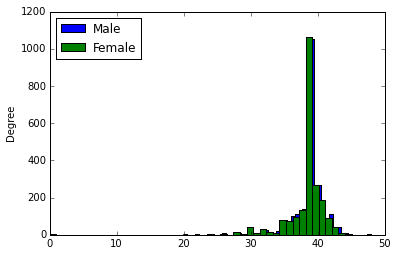

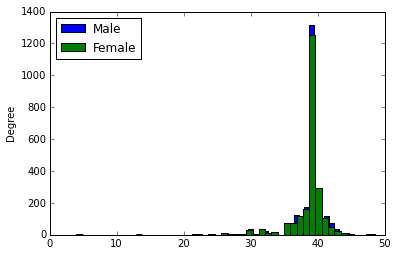

In [141]:

print 'pregnancy length for first baby',firsts.prglngth.mean()
print '\t\t\tstd:',firsts.prglngth.std()
print 'mean preg length for other babies',others.prglngth.mean()
print '\t\t\tstd:',others.prglngth.std()
print 'difference', abs(others.prglngth.mean() - firsts.prglngth.mean())

plt.figure()
firsts.prglngth[firsts.babysex==1].plot('hist', bins=49, label="Male")
firsts.prglngth[firsts.babysex==2].plot('hist', bins=49, label="Female")
plt.legend(loc="best")
plt.xlim(0,50)
plt.figure()
others.prglngth[others.babysex==1].plot('hist', bins=49, label="Male")
others.prglngth[others.babysex==2].plot('hist', bins=49, label="Female")
plt.legend(loc="best")
plt.xlim(0,50)